### 📖1. Import pandas und NumPy, so you can call them by  an abbreviation

In [2]:
import pandas as pd
import numpy as np

### 📖2. Create a DataFrame that contains the information shown below

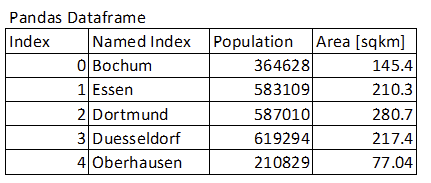

In [32]:
mydata = {
    'City': ['Bochum', 'Essen', 'Dortmund', 'Duesseldorf', 'Oberhausen'],
    'Population': [364628, 583109, 587010, 619294, 210829],
    'Area_sqkm': [145.4, 210.3, 280.7, 217.4, 77.04]
}
df_pop = pd.DataFrame(mydata)
df_pop

,City,Population,Area_sqkm
0,Bochum,364628,145.40
1,Essen,583109,210.30
2,Dortmund,587010,280.70
3,Duesseldorf,619294,217.40
4,Oberhausen,210829,77.04


### ✏️3. Use the DataFrame from the previous task to calculate a new column with the population density for each city

In [35]:
df_pop['Density'] = df_pop["Population"] / df_pop["Area_sqkm"]
df_pop

,City,Population,Area_sqkm,Density
0,Bochum,364628,145.40,2507.757909
1,Essen,583109,210.30,2772.748455
2,Dortmund,587010,280.70,2091.236195
3,Duesseldorf,619294,217.40,2848.638454
4,Oberhausen,210829,77.04,2736.617342


### 📖4. Load the CSV file  "Airmeasuringstation-data_EPSG25832_CSV.csv"

In [3]:
df = pd.read_csv("./Data/Airmeasuringstation-data_EPSG25832_CSV.csv", sep=';')
df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
0,1,2008,January,20080103,20080201,37
1,1,2008,February,20080201,20080229,55
2,1,2008,March,20080229,20080401,44
3,1,2008,April,20080401,20080430,53
4,1,2008,May,20080430,20080530,55
...,...,...,...,...,...,...
4401,1031,2022,February,20220129,20220302,18
4402,1031,2022,March,20220302,20220331,24
4403,1031,2022,April,20220331,20220502,20
4404,1031,2022,May,20220502,20220601,16


### 📖5. Replace -9999 by NaN
If you open the CSV in Excel, you will notice that there are some measurements with -9999. This NoData value will effect statistical calculations and should be replaced by 'NaN'. Check Google how to solve this issue, or use [this link](https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan) if you do not find any answers.
Hint1: It is easier to replace the NoData value for the whole DataFrame
Hint2: Store it in a new variable

In [4]:
cleaned_df = df.replace(-9999, np.NaN)
cleaned_df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
0,1,2008,January,20080103,20080201,37.0
1,1,2008,February,20080201,20080229,55.0
2,1,2008,March,20080229,20080401,44.0
3,1,2008,April,20080401,20080430,53.0
4,1,2008,May,20080430,20080530,55.0
...,...,...,...,...,...,...
4401,1031,2022,February,20220129,20220302,18.0
4402,1031,2022,March,20220302,20220331,24.0
4403,1031,2022,April,20220331,20220502,20.0
4404,1031,2022,May,20220502,20220601,16.0


### 📖6. Calculate the mean, stdv, min, max and quantiles of the NO2 values for each measuring point

In [6]:
cleaned_df[['MEASURED VALUE', 'MEASURE POINT']].groupby('MEASURE POINT').describe()

MEASURED VALUE                                                  \
                       count       mean        std   min    25%   50%    75%   
MEASURE POINT                                                                  
1                      174.0  36.356322   9.235489  17.0  29.00  36.5  43.00   
2                      173.0  57.491329  12.456258  31.0  49.00  59.0  66.00   
3                       60.0  42.933333   6.196956  26.0  39.00  43.0  47.25   
4                      173.0  46.508671   9.579301  27.0  40.00  48.0  53.00   
5                      173.0  46.017341  10.475594  24.0  39.00  46.0  54.00   
7                      174.0  40.040230   9.440020  21.0  33.00  40.0  46.75   
8                      174.0  35.954023   7.435904  21.0  30.00  36.0  40.75   
9                      174.0  46.793103  10.190257  27.0  40.00  46.0  53.00   
13                     173.0  45.092486   8.369560  26.0  39.00  45.0  51.00   
14                     174.0  37.448276   7.457407  22.0  32.00  37.0  43.00   
16                     173.0  51.335260   9.323188  31.0  46.00  53.0  57.00   
17                     173.0  50.115607   9.516109  28.0  44.00  51.0  56.00   
19                      60.0  43.166667   6.067883  28.0  39.50  43.0  47.00   
20                     174.0  39.160920   7.773340  24.0  33.00  39.5  45.00   
21                     174.0  43.270115   8.757591  25.0  36.25  44.0  49.00   
22                     173.0  38.381503   7.658716  24.0  33.00  38.0  43.00   
24                     172.0  35.918605   9.058246  12.0  30.00  36.0  42.00   
26                      12.0  34.333333   6.124961  28.0  28.75  33.5  37.00   
27                     174.0  27.137931   5.912996  15.0  23.00  27.0  31.00   
28                     173.0  44.196532   8.749524  26.0  37.00  45.0  50.00   
29                      12.0  45.666667   5.944185  35.0  43.50  45.0  47.75   
30                      60.0  43.033333  10.293929  22.0  35.75  44.5  51.00   
31                      12.0  35.166667   3.270622  31.0  32.75  34.5  38.00   
32                      12.0  27.333333   4.355422  22.0  23.75  26.5  32.00   
33                     174.0  41.517241   8.575219  21.0  36.00  41.0  47.00   
34                     173.0  46.023121   9.671917  25.0  41.00  46.0  53.00   
38                     173.0  41.225434   7.672894  24.0  36.00  41.0  46.00   
39                      36.0  33.111111   4.785560  24.0  29.00  33.5  37.00   
40                      36.0  36.555556   5.448168  28.0  32.25  37.0  40.00   
41                      12.0  29.333333   3.576014  25.0  26.00  28.5  31.75   
42                      12.0  31.083333   2.745520  28.0  28.75  31.0  32.50   
43                     102.0  37.166667   8.035914  22.0  30.00  38.5  44.00   
44                      24.0  30.416667   4.392847  23.0  27.00  29.0  33.25   
45                      77.0  38.701299   6.826930  26.0  33.00  38.0  44.00   
46                      78.0  29.589744   5.950960  18.0  26.00  29.0  33.00   
47                      78.0  29.653846   5.872735  18.0  26.00  29.0  33.00   
48                      40.0  33.500000   4.893743  26.0  29.00  33.0  37.25   
49                      40.0  27.800000   4.427189  20.0  24.00  27.5  32.00   
50                      40.0  29.525000   4.551627  21.0  26.00  30.0  32.50   
51                      39.0  25.205128   4.549028  17.0  22.00  26.0  28.00   
52                      37.0  26.540541   4.986619  17.0  23.00  26.0  30.00   
53                      27.0  35.777778   3.400603  31.0  33.00  36.0  38.00   
54                       6.0  18.500000   3.082207  15.0  16.25  18.0  20.50   
55                       6.0  20.000000   3.633180  16.0  17.50  19.5  21.50   
1031                     6.0  20.166667   3.250641  16.0  18.25  19.5  23.00   

                     
                max  
MEASURE POINT        
1              60.0  
2              83.0  
3              54.0  
4              67.0  
5              77.0

### 📖7. Filter for measuring station 22

In [7]:
point22 = cleaned_df[cleaned_df['MEASURE POINT'] == 22]
point22

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
2382,22,2008,January,20080103,20080201,34.0
2383,22,2008,February,20080201,20080229,55.0
2384,22,2008,March,20080229,20080401,44.0
2385,22,2008,April,20080401,20080430,57.0
2386,22,2008,May,20080430,20080530,58.0
...,...,...,...,...,...,...
2551,22,2022,February,20220129,20220302,27.0
2552,22,2022,March,20220302,20220331,36.0
2553,22,2022,April,20220331,20220502,30.0
2554,22,2022,May,20220502,20220601,29.0


### 📖8. Calculate the number of days with a NO2 value above 50 for station 22
Print the result with a f-string

In [8]:
above_50 = sum(point22['MEASURED VALUE']>50)
print(f"There were {above_50} days with an NO2 value above 50")

There were 14 days with an NO2 value above 50


### ✏️9. Save the DataFrame from task six to a new file

In [9]:
cleaned_df.to_csv('./Data/Test.csv', sep=';')